In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df['CustomerID'].duplicated().sum()

0

In [6]:
df.drop(columns='CustomerID', inplace=True)

In [7]:
df.select_dtypes(include='object').columns.to_list()

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [8]:
df['CityTier'].dtype

dtype('int64')

In [9]:
df['CityTier'].unique()

array([3, 1, 2], dtype=int64)

In [10]:
df['CityTier'] = df['CityTier'].astype('str')
df['CityTier'].dtype

dtype('O')

In [11]:
df.select_dtypes(include='object').columns.to_list()

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

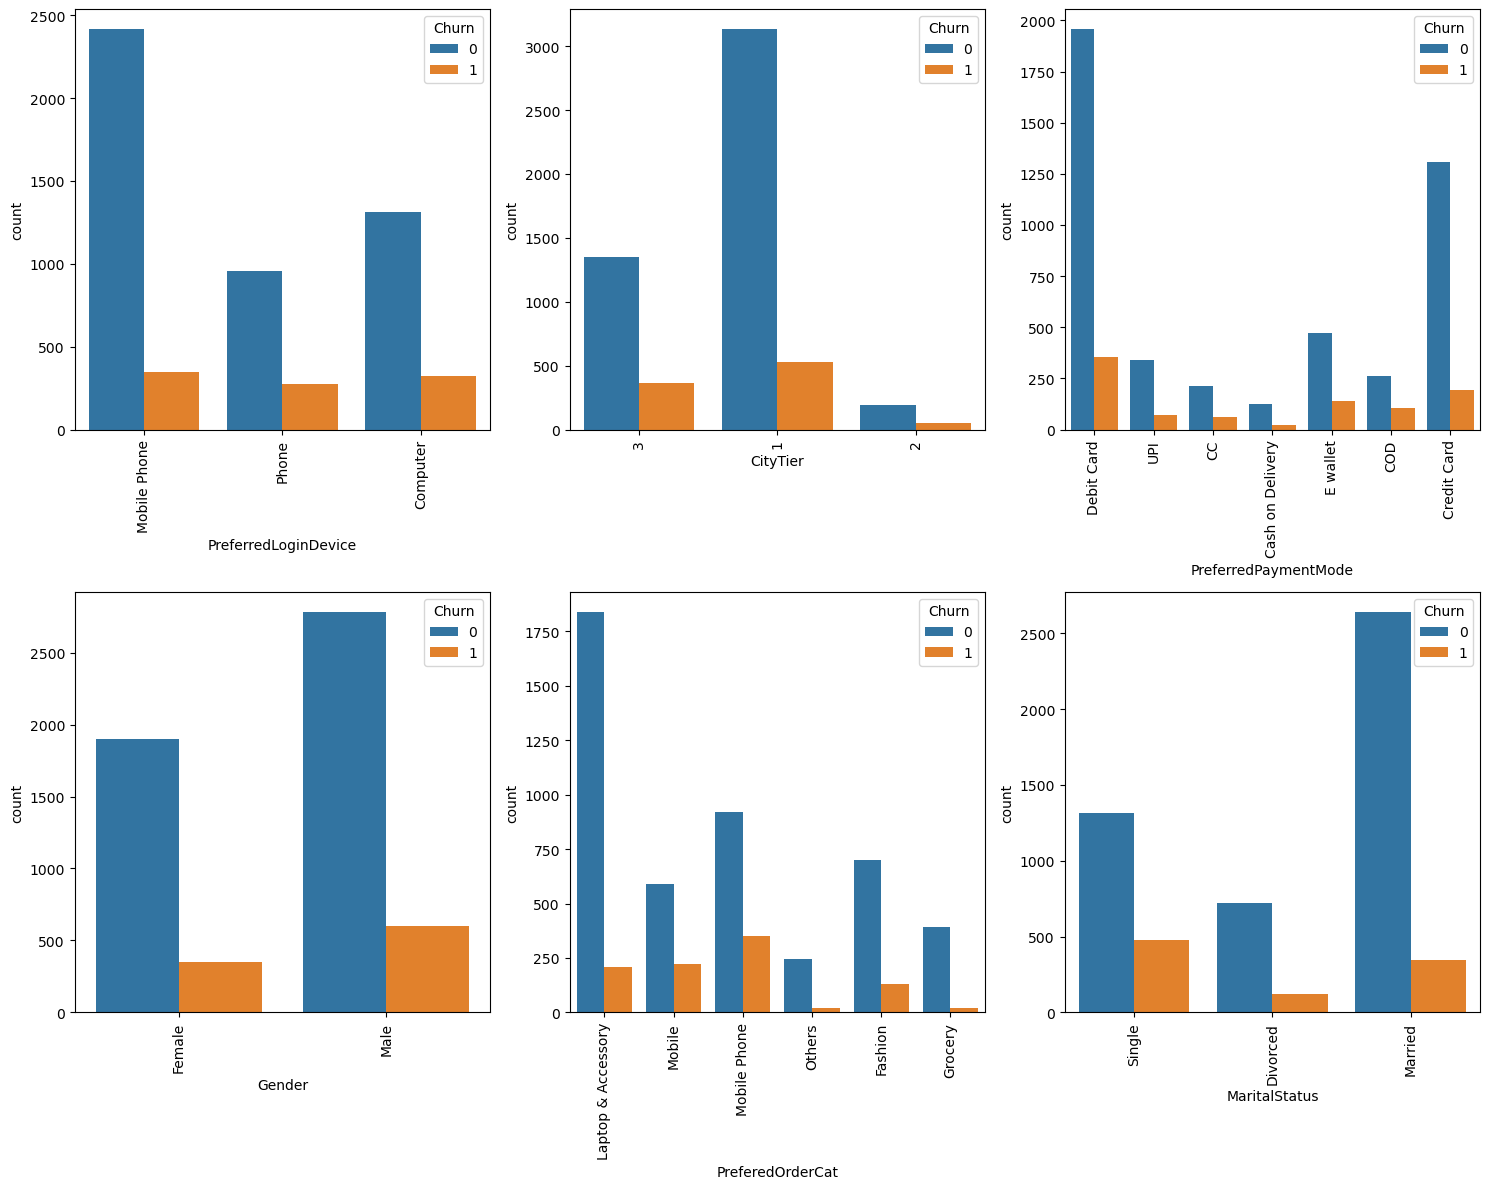

In [12]:
cat_var = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
axs = axs.flat

for i, var in enumerate(cat_var):
    sns.countplot(data=df, x=var, hue=df['Churn'], ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
fig.tight_layout()

plt.show()

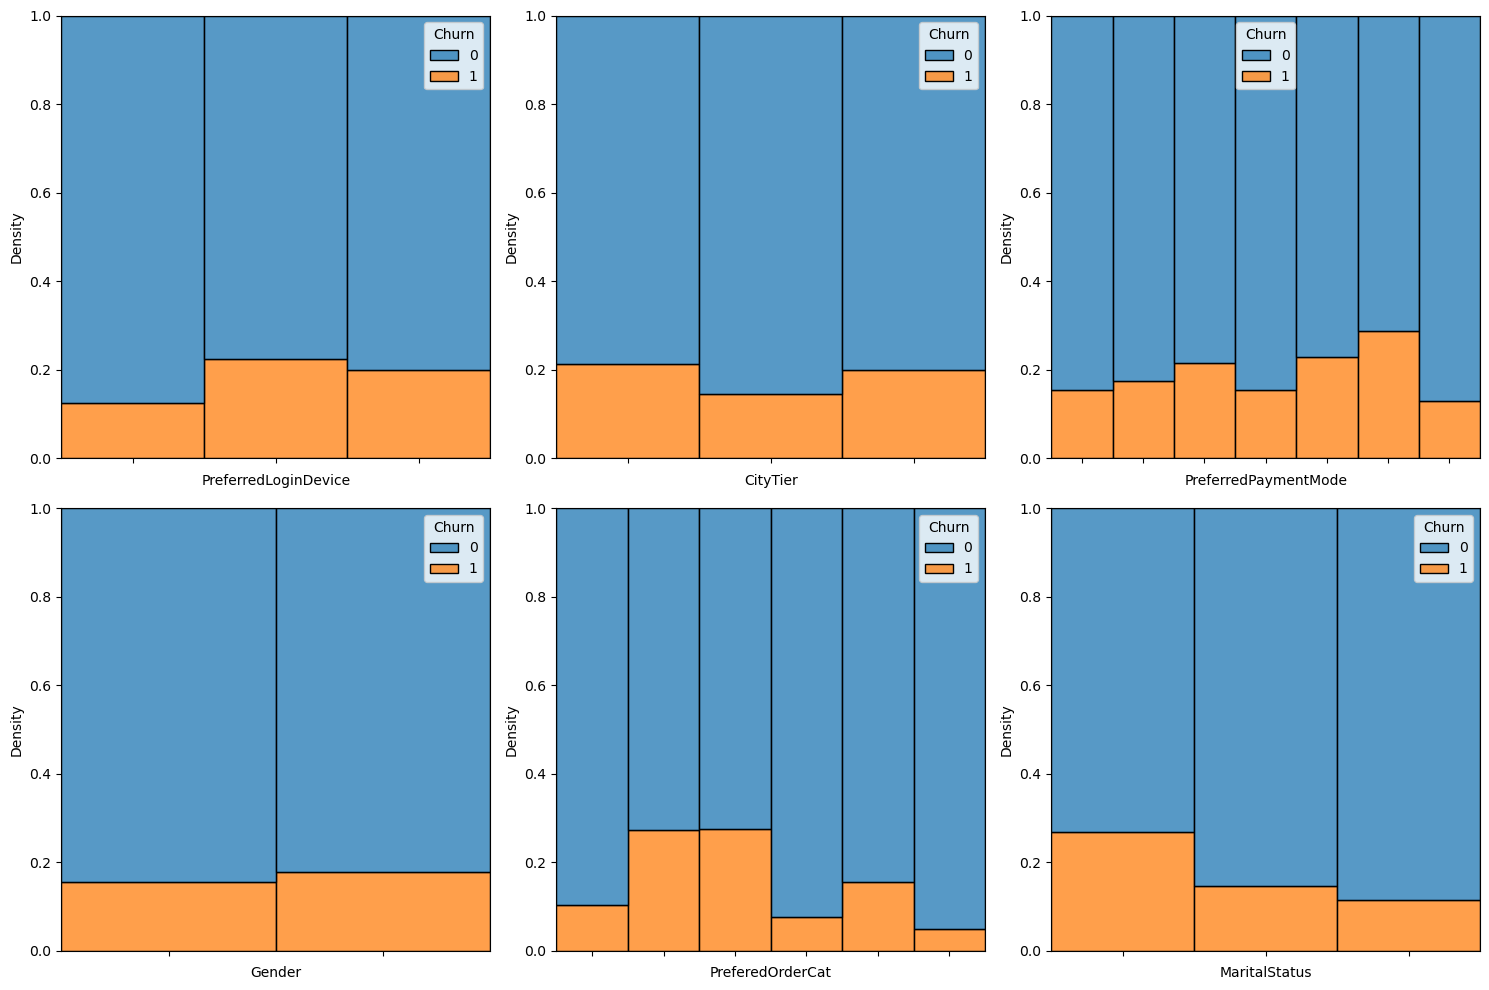

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate(cat_var):
    sns.histplot(data=df, x=var, ax=axs[i], hue='Churn', stat='density', multiple='fill')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

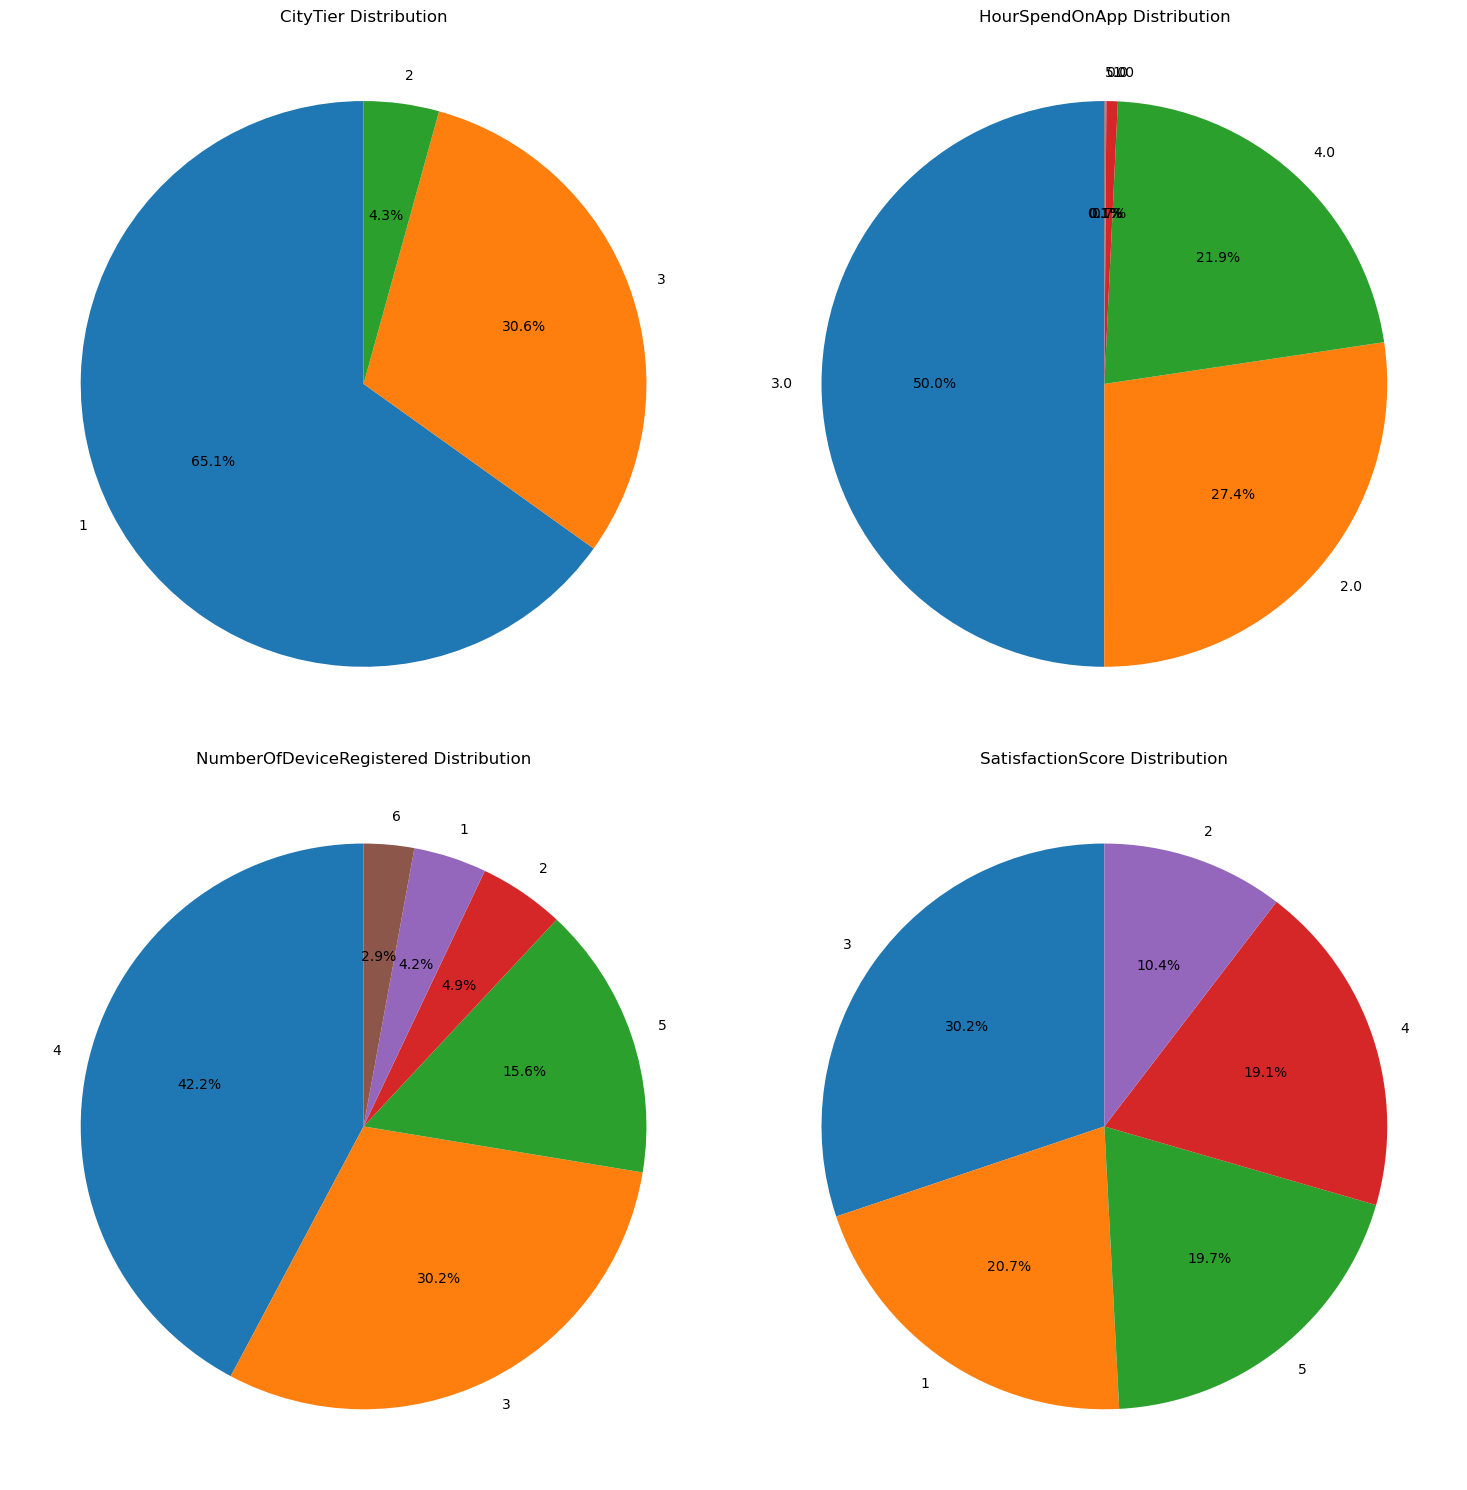

In [14]:
cat_var = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate(cat_var):
    if i < len(axs.flat):
        cat_count = df[var].value_counts()
        
        axs.flat[i].pie(cat_count, labels=cat_count.index, autopct='%1.1f%%', startangle=90)
        
        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()

fig.show()

In [ ]:
len(axs.flat)

In [ ]:
df[['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']].dtypes

In [ ]:
len(axs.flat)